# Deep Learning Exam by Ghulam Mustafa
# PDG DSAI B-6 Data Science and Artificial Intelligence

## Q. Define deep learning and explain how it differs from traditional machine learning?

Deep Learning is a subfield of machine learning that utilizes artificial neural networks with multiple layers (hence "deep") to learn complex patterns and representations from data. These neural networks are inspired by the structure and function of the human brain, enabling them to automatically extract features and learn hierarchical representations.   

Key Differences from Traditional Machine Learning:

1. Feature Engineering:

Traditional ML: Often requires manual feature engineering, where human experts carefully select and transform relevant features from raw data.   

Deep Learning: Automatically learns relevant features directly from raw data, eliminating the need for extensive manual feature engineering.   

2. Model Complexity:

Traditional ML: Typically employs simpler models like decision trees, support vector machines, or linear regression.   

Deep Learning: Utilizes complex, multi-layered neural networks with millions or even billions of parameters.   

3. Data Requirements:

Traditional ML: Can often achieve good results with relatively small datasets.

Deep Learning: Generally requires large amounts of data to train effectively due to the complexity of the models.   

4. Computational Power:

Traditional ML: Can often be trained on standard computers.

Deep Learning: Often requires powerful hardware like GPUs or TPUs to efficiently train complex models.   

In essence, deep learning automates the feature engineering process and leverages powerful neural networks to learn intricate patterns from massive datasets, enabling it to excel in tasks like image recognition, natural language processing, and speech recognition.

In [6]:
import numpy as np
import pandas as pd
import skimpy as sk
# Core deep learning libraries
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# For loading and preprocessing data
from tensorflow.keras.datasets import mnist, fashion_mnist, cifar10

# For building and training models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam

# For data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# For evaluating model performance
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Q. Train ANN model using mnist dataset and plot test accuracy and loss metrics.

In [20]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [21]:
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [23]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [27]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 27s 16ms/step - accuracy: 0.8849 - loss: 0.3778 - val_accuracy: 0.9801 - val_loss: 0.0688
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9781 - loss: 0.0732 - val_accuracy: 0.9827 - val_loss: 0.0564
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9856 - loss: 0.0467 - val_accuracy: 0.9850 - val_loss: 0.0508
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.9893 - loss: 0.0333 - val_accuracy: 0.9840 - val_loss: 0.0541
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9918 - loss: 0.0258 - val_accuracy: 0.9878 - val_loss: 0.0495
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9929 - loss: 0.0212 - val_accuracy: 0.9852 - val_loss: 0.0524
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 12ms/step - accuracy: 0.9944 - loss: 0.0175 - val_accuracy: 0.9856 - val_loss: 0.0587
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 14ms/step - accuracy: 0.9946 -

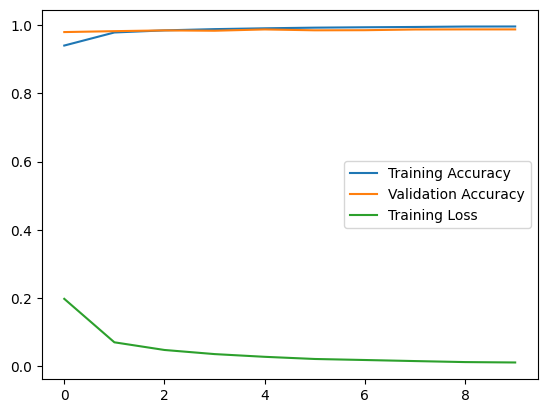

In [28]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

## Q. Train CNN model using mnist dataset, plot test accuracy and loss metrics and compare with above question number 2 metrics.

In [15]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [16]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

In [17]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8850 - loss: 0.3567 - val_accuracy: 0.9843 - val_loss: 0.0527
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 17s 11ms/step - accuracy: 0.9813 - loss: 0.0601 - val_accuracy: 0.9865 - val_loss: 0.0444
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9878 - loss: 0.0381 - val_accuracy: 0.9896 - val_loss: 0.0361
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9916 - loss: 0.0280 - val_accuracy: 0.9890 - val_loss: 0.0406
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9939 - loss: 0.0198 - val_accuracy: 0.9894 - val_loss: 0.0362
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9892 - val_loss: 0.0398
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 36s 13ms/step - accuracy: 0.9952 - loss: 0.0141 - val_accuracy: 0.9904 - val_loss: 0.0350
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 18s 12ms/step - accuracy: 0.9961 -

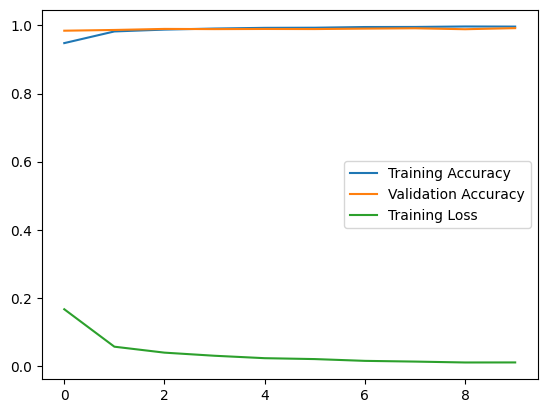

In [18]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Training Loss')
plt.legend()
plt.show()

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8493 - loss: 0.5198 - val_accuracy: 0.9522 - val_loss: 0.1643
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9488 - loss: 0.1716 - val_accuracy: 0.9628 - val_loss: 0.1220
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9637 - loss: 0.1230 - val_accuracy: 0.9688 - val_loss: 0.1051
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9705 - loss: 0.0962 - val_accuracy: 0.9732 - val_loss: 0.0895
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9754 - loss: 0.0812 - val_accuracy: 0.9709 - val_loss: 0.0939
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9785 - loss: 0.0698 - val_accuracy: 0.9745 - val_loss: 0.0858
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9798 - loss: 0.0629 - val_accuracy: 0.9760 - val_loss: 0.0834
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9823 - loss: 0.0549 -

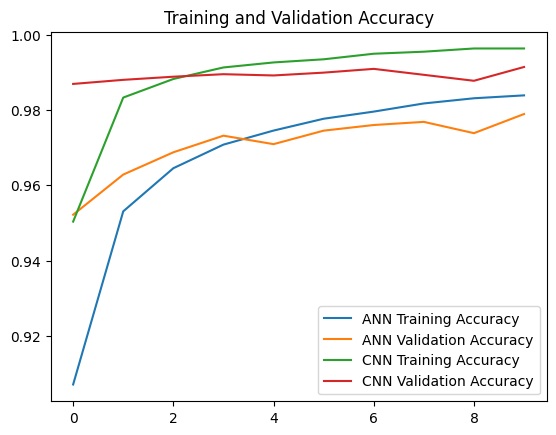

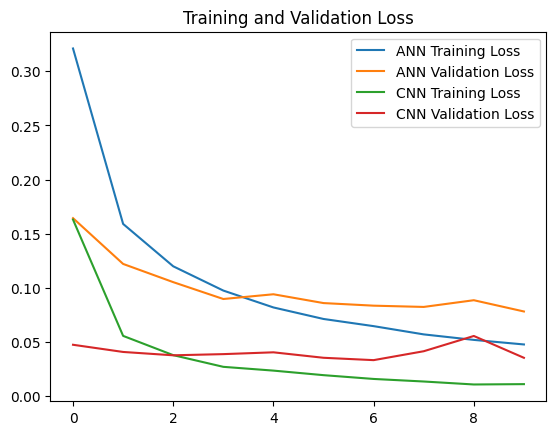

In [29]:
# Define ANN model architecture
ann_model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile ANN model
ann_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define CNN model architecture
cnn_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

# Compile CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train ANN model
ann_history = ann_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Train CNN model
cnn_history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

# Plot training and validation accuracy
plt.plot(ann_history.history['accuracy'], label='ANN Training Accuracy')
plt.plot(ann_history.history['val_accuracy'], label='ANN Validation Accuracy')
plt.plot(cnn_history.history['accuracy'], label='CNN Training Accuracy')
plt.plot(cnn_history.history['val_accuracy'], label='CNN Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Plot training and validation loss
plt.plot(ann_history.history['loss'], label='ANN Training Loss')
plt.plot(ann_history.history['val_loss'], label='ANN Validation Loss')
plt.plot(cnn_history.history['loss'], label='CNN Training Loss')
plt.plot(cnn_history.history['val_loss'], label='CNN Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

## Q. Explain the concept of overfitting and provide two techniques to reduce it.

Overfitting in deep learning occurs when a model becomes too specialized in the training data, capturing noise and irrelevant patterns. This leads to excellent performance on the training set but poor generalization to new, unseen data.

- Key Characteristics of Overfitting:

1. High Training Accuracy, Low Test Accuracy: The model achieves very high accuracy on the training data but performs poorly on the validation or test set.

2. Memorization, Not Generalization: The model memorizes the training data rather than learning underlying patterns.

3. Complex Model: Overfitting is more likely with complex models, such as those with many layers or parameters.

- Causes of Overfitting:

1. Model complexity: Models with too many parameters or complex architectures are more prone to overfitting.
2. Small training dataset: When the training dataset is small, the model may not have enough data to learn from, leading to overfitting.
3. Noise in the data: Noisy or irrelevant features in the data can cause the model to overfit.

- Techniques to Reduce Overfitting:

1. Regularization

Regularization techniques add a penalty term to the loss function to discourage large weights and prevent overfitting. There are two common types of regularization:

- L1 Regularization (Lasso): Adds a term to the loss function that is proportional to the absolute value of the weights.
- L2 Regularization (Ridge): Adds a term to the loss function that is proportional to the square of the weights.

2. Dropout

Dropout is a technique where a fraction of the neurons in the network are randomly dropped out during training. This helps to:

- Reduce overfitting by preventing any single neuron from having too much influence on the output.
- Encourage the network to learn multiple representations of the data.

In [ ]:
# By applying dropout, the network is forced to learn a more robust representation of the data,
# which generalizes better to new, unseen data.
# Example Code:

from keras.regularizers import l2

# Define a neural network model with L2 regularization and dropout
model = Sequential()
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Q. Explain the importance of using a test set and how it differs from a validation set

A test set is a set of data that is used to evaluate the performance of a trained machine learning model on unseen data. The test set is separate from the training and validation sets and is not used during the training process. The purpose of the test set is to provide an unbiased estimate of the model's performance on new, unseen data.

The test set is important because it allows us to assess the generalization performance of the model. If the model performs well on the test set, it is likely to perform well on new, unseen data. If the model performs poorly on the test set, it may be overfitting the training data and not generalizing well to new situations.

Differences between Test and Validation Sets:

The test set and validation set are both used to evaluate the performance of a trained model, but they are used at different stages of the training process and serve different purposes:

- Test Set: The test set is used to evaluate the final performance of the trained model on unseen data. The test set is separate from the training and validation sets and is not used during the training process. The purpose of the test set is to provide an unbiased estimate of the model's performance on new, unseen data.
- Validation Set: The validation set is used to evaluate the performance of the model during the training process. The validation set is used to tune hyperparameters and select the best model architecture. The purpose of the validation set is to prevent overfitting by ensuring that the model generalizes well to new data.
In summary, the test set is used to evaluate the final performance of the trained model on unseen data, while the validation set is used to evaluate the performance of the model during the training process to prevent overfitting.